# MLP Visualiser

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ous_data/data_preprocessed.csv')

In [4]:
df.shape

(27590, 41)

In [6]:
df.columns

Index(['IB3', 'IH1', 'IB2', 'IH2', 'IB1', 'IH3', 'IB4', 'IH4', 'IB5',
       'confusion', 'careless_1', 'careless_2', 'careless_3',
       'technical_problems', 'native_language', 'Q_Lang', 'religion_text',
       'religion_1', 'religion_2', 'religion_3', 'religion_4', 'religion_5',
       'religion_6', 'religion_7', 'religion_8', 'religion_9', 'religion_10',
       'religion_11', 'religion_12', 'religion_13', 'religion_14',
       'religion_15', 'religion_16', 'education_leve', 'education_level_iran',
       'education_level_germ', 'age_1', 'sex', 'countr_origin_1', 'country3',
       'Age'],
      dtype='object')

In [33]:
df1 = df[['IB3', 'IH1', 'IB2', 'IH2', 'IB1', 'IH3', 'IB4', 'IH4', 'IB5',
        'native_language', 'Q_Lang',
       'religion_1', 'religion_2', 'religion_3', 'religion_4', 'religion_5',
       'religion_6', 'religion_7', 'religion_8', 'religion_9', 'religion_10',
       'religion_11', 'religion_12', 'religion_13', 'religion_14',
       'religion_15', 'religion_16', 'education_leve', 'sex', 'countr_origin_1', 'country3',
       'Age']]

In [34]:
df1.columns

Index(['IB3', 'IH1', 'IB2', 'IH2', 'IB1', 'IH3', 'IB4', 'IH4', 'IB5',
       'native_language', 'Q_Lang', 'religion_1', 'religion_2', 'religion_3',
       'religion_4', 'religion_5', 'religion_6', 'religion_7', 'religion_8',
       'religion_9', 'religion_10', 'religion_11', 'religion_12',
       'religion_13', 'religion_14', 'religion_15', 'religion_16',
       'education_leve', 'sex', 'countr_origin_1', 'country3', 'Age'],
      dtype='object')

## Data processing

In [ ]:
def analyze_questionnaire(df):
    """
    Create visualisations for questionnaire data based on demographic factors.
    
    Parameters:
    df: pandas DataFrame with columns:
        - First 9 columns: questionnaire answers
        - age: respondent's age
        - educationlevel: education level
        - country: country of residence
        - gender: respondent's gender
    """

    # Set up the plotting style
    plt.style.use('ggplot')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Average responses by age groups
    plt.subplot(2, 2, 1)

    # Create age groups
    df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    
    # Calculate mean responses for first 9 questions by age group
    age_means = df.iloc[:, :9].groupby(df['age_group']).mean()
    
    # Create heatmap
    sns.heatmap(age_means, cmap='YlOrRd', annot=True, fmt='.2f')
    plt.title('Average Responses by Age Group')
    plt.xlabel('Question Number')
    plt.ylabel('Age Group')
    
    # 2. Response distribution by education level
    plt.subplot(2, 2, 2)
    edu_means = df.iloc[:, :10].groupby(df['education_leve']).mean().T
    edu_means.plot(kind='bar', ax=plt.gca())
    plt.title('Response Patterns by Education Level')
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    
    # 3. Country-wise response patterns (top 9 countries)
    plt.subplot(2, 2, 3)
    top_countries = df['country3'].value_counts().nlargest(9).index
    country_data = df[df['country3'].isin(top_countries)]
    country_means = df.iloc[:, :10].groupby(df['country3']).mean()
    
    sns.boxplot(data=country_data.melt(id_vars=['country3'], value_vars=df.columns[:10]), 
                x='country3', y='value')
    plt.title('Response Distribution by Country (Top 10)')
    plt.xticks(rotation=45)
    plt.xlabel('Country')
    plt.ylabel('Response Value')
    
    # 4. Gender comparison
    plt.subplot(2, 2, 3)
    gender_means = df.iloc[:, :10].groupby(df['sex']).mean().T
    gender_means.plot(kind='line', marker='o')
    plt.title('Gender Comparison Across Questions')
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.legend(title='Gender')
    
    plt.tight_layout()
    
    return fig

/var/folders/l8/kn3s865x1215_zj8rfdf3hv80000gn/T/ipykernel_13075/2012044774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
/var/folders/l8/kn3s865x1215_zj8rfdf3hv80000gn/T/ipykernel_13075/2012044774.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.iloc[:, :9].groupby(df['age_group']).mean()


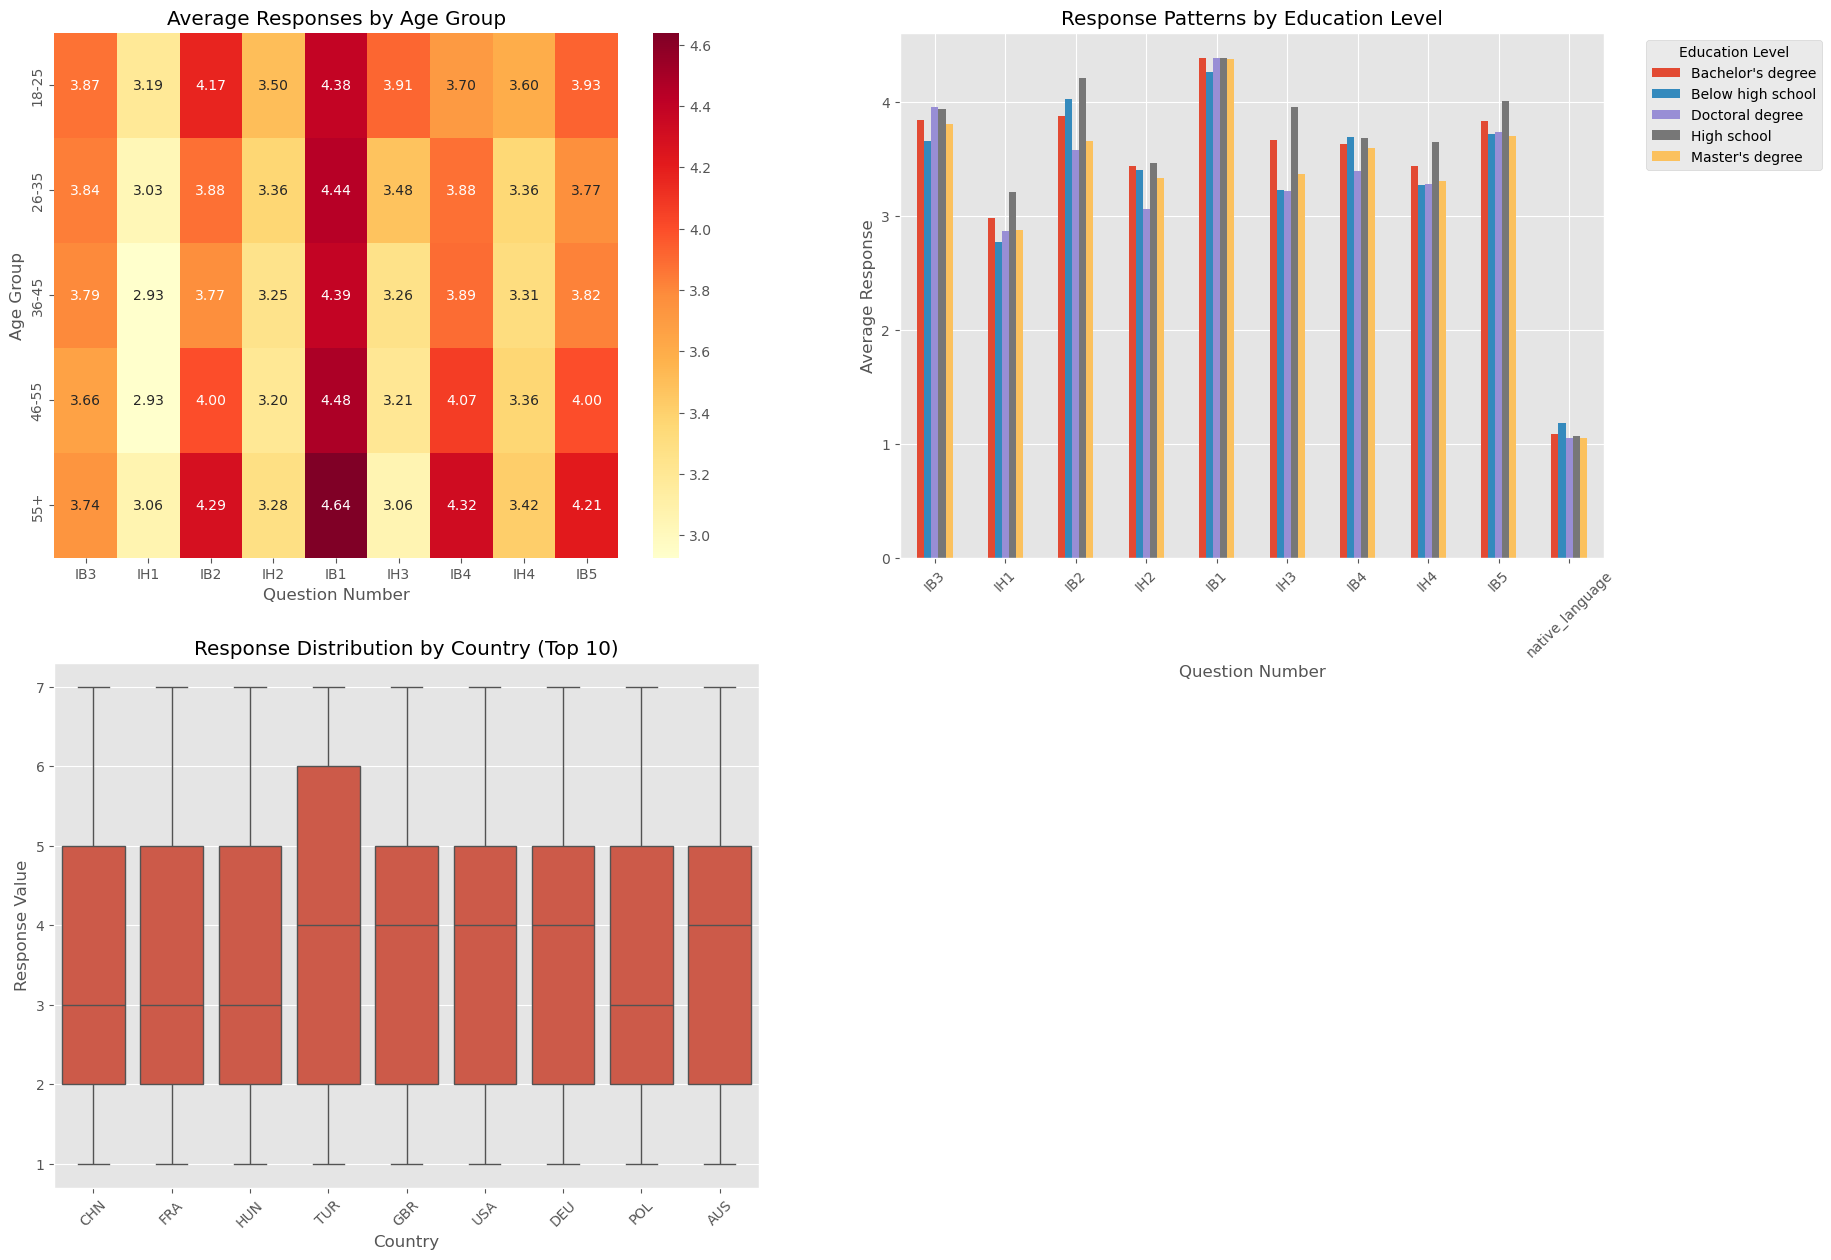

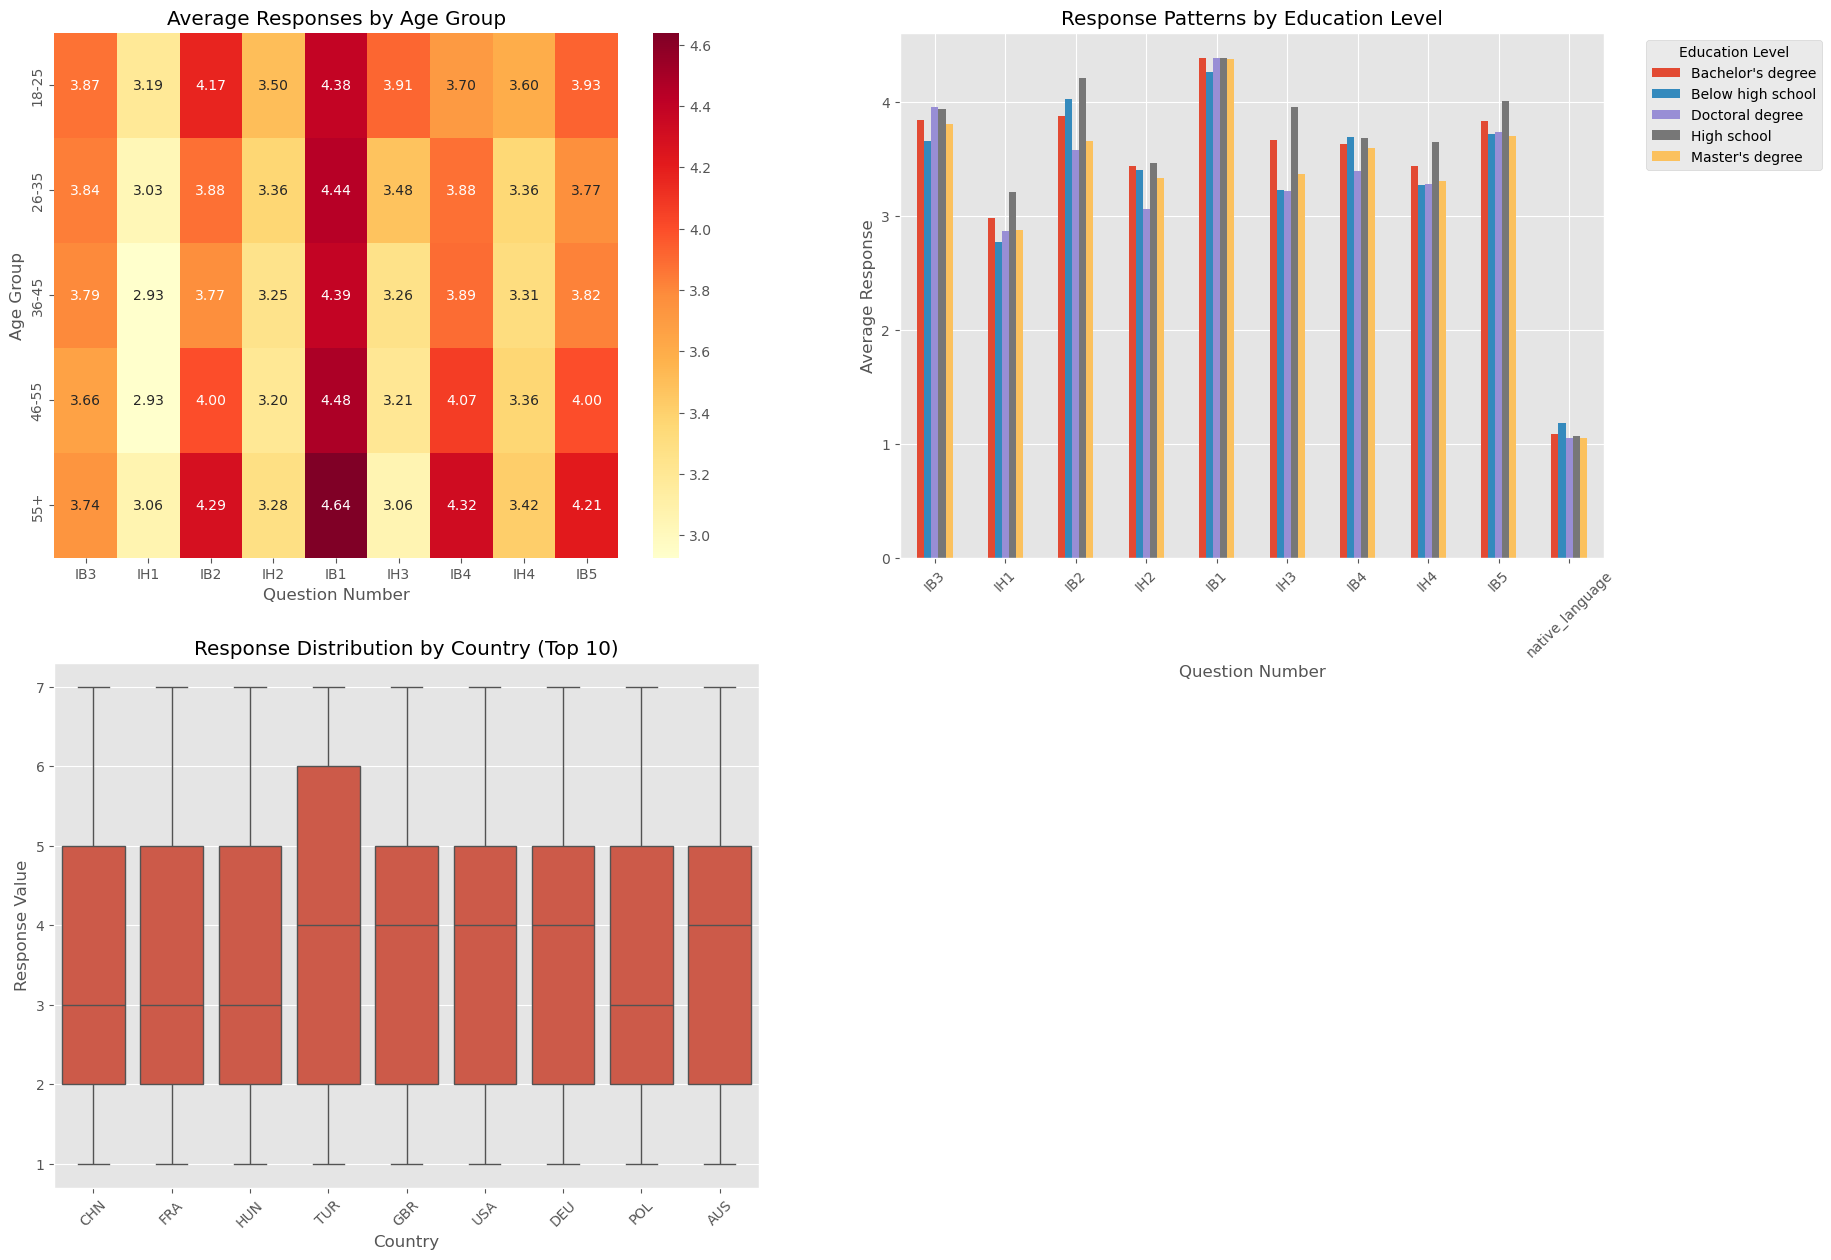

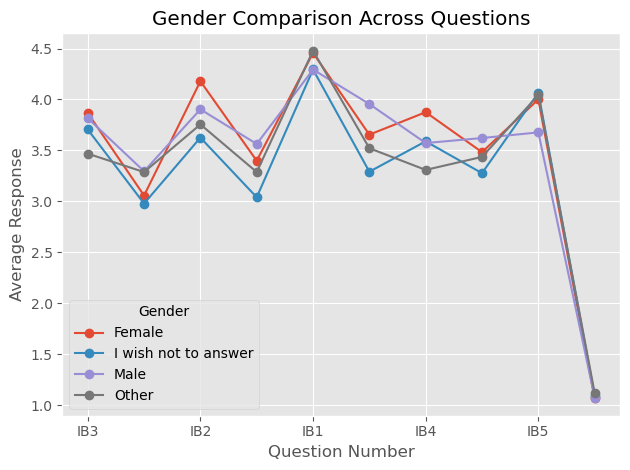

In [53]:
analyze_questionnaire(df1)